# **SPOT-your-FI pt- 3 (Cleaning)**

## Libraries

In [80]:
import re
import pandas as pd
import numpy as np
import csv
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
%matplotlib inline
import pandas as pd # Import for Pandas
import numpy as np # Import for Numpy
import matplotlib # Import for Matplotlib
import matplotlib.pyplot as plt # Import for Matplotlib Pyplot
import seaborn as sns # Import for Seaborn
from wordcloud import WordCloud # Import for Word Cloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aggar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Cleaning unwanted characters

In [82]:

file = open("lyrics.txt")
text = file.read()
text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", text.lower())


## Removing stop words like is, am, are

In [83]:
stop = stopwords.words('english')
text = [word for word in text.split() if word not in (stop)]

## Counting word frequencies

In [84]:
file = open("G:\SPOTIFY EDA\MyData\ALL CLEAN TEXT 1000.txt", 'r')
text = file.read()

def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

dict_data = word_count(text)


In [87]:
csv_columns = ['Word', 'Frequency'] # Dictionary Formation
dict(dict_data)

{'silence': 15,
 'talking': 7,
 'everyone': 4,
 'always': 77,
 'noise': 1,
 'head': 26,
 'nonsense': 1,
 'feel': 119,
 'love': 195,
 'guarded': 2,
 'overthink': 1,
 'started': 8,
 'knew': 19,
 'second': 9,
 'walked': 5,
 'could': 112,
 'something': 49,
 'everybody': 32,
 'looking': 12,
 'start': 8,
 'riot': 2,
 'every': 39,
 'time': 89,
 'look': 80,
 'eye': 46,
 'world': 55,
 'get': 119,
 'quiet': 3,
 'let': 92,
 'go': 156,
 'fall': 44,
 'fly': 13,
 'keep': 66,
 'trying': 22,
 'cause': 156,
 'sat': 13,
 'dreaming': 7,
 'wide': 3,
 'awake': 3,
 'seeing': 5,
 'thinking': 12,
 'please': 24,
 'worry': 1,
 'waiting': 19,
 'know': 263,
 'believe': 25,
 'saying': 7,
 'hurry': 2,
 'enemy': 16,
 'dan': 2,
 'reynolds': 2,
 'wake': 8,
 'sound': 12,
 'allows': 1,
 'mind': 62,
 'run': 92,
 'around': 26,
 'ear': 3,
 'ground': 20,
 'searching': 2,
 'behold': 1,
 'story': 17,
 'told': 25,
 'back': 59,
 'smiling': 5,
 'turned': 3,
 'tell': 86,
 'greatest': 2,
 'turn': 23,
 'hate': 16,
 'u': 40,
 'oh': 

## Converting Dictionary to CSV

In [86]:
with open('WORD FRE.csv', 'w') as f:  # You will need 'wb' mode in Python 2.x
    w = csv.DictWriter(f, dict_data.keys())
    w.writeheader()
    w.writerow(dict_data)

# **SPOT-your-FI pt- 4 (Analysis)**

## Libraries

In [4]:
from textblob import TextBlob
import pandas as pd
import warnings
import csv

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    


## Analying functions

In [2]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
    def getPolarity(review):
        return TextBlob(review).sentiment.polarity
def getPolarity(text):
       return TextBlob(text).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


In [88]:
### Reading the main dataset of word frequencies

In [6]:
data = pd.read_csv("Words data.csv")
data

,Words,Freq,Polarity,Subjectivity,Analysis
0,silence,15,NaN,NaN,NaN
1,talking,7,NaN,NaN,NaN
2,everyone,4,NaN,NaN,NaN
3,always,77,NaN,NaN,NaN
4,noise,1,NaN,NaN,NaN
...,...,...,...,...,...
1918,bummer,1,NaN,NaN,NaN
1919,insecure,2,NaN,NaN,NaN
1920,pour,1,NaN,NaN,NaN
1921,level,1,NaN,NaN,NaN


In [7]:
rows = len(data.axes[0])
rows

1923

## Polarity, Subjectivity and Analysis

In [58]:
import openpyxl as opx
import textblob
# importing module
from pandas import *

# reading CSV file
data = read_csv("Words data.csv")

# converting column data to list
rows = len(data.axes[0])
i = 0
while i < int(1922):
    Word = data['Words'][i]
    data['Polarity'][i] = getPolarity(Word)
    data['Analysis'][i] = analysis(data['Polarity'][i])
    data['Subjectivity'][i] = getSubjectivity(data['Words'][i])
    i+=1

data.to_csv("WORD Latest.csv")


C:\Users\aggar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\aggar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\aggar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\core\indexing.py:1732: S

## Main Dataset with Sentiments

In [8]:
x = pd.read_csv("WORD Latest.csv")
x.head(10)

,Unnamed: 0,Words,Freq,Polarity,Subjectivity,Analysis
0,0,silence,15,0.0,0.0,Neutral
1,1,talking,7,0.0,0.0,Neutral
2,2,everyone,4,0.0,0.0,Neutral
3,3,always,77,0.0,0.0,Neutral
4,4,noise,1,0.0,0.0,Neutral
5,5,head,26,0.0,0.0,Neutral
6,6,nonsense,1,0.0,0.0,Neutral
7,7,feel,119,0.0,0.0,Neutral
8,8,love,195,0.5,0.6,Positive
9,9,guarded,2,0.4,0.6,Positive


Basic Statistics of the dataframe(df)

In [79]:
x.describe()

,Unnamed: 0,Freq,Polarity,Subjectivity
count,1923.000000,1923.000000,1922.000000,1922.000000
mean,961.000000,8.224649,0.001202,0.074035
std,555.266603,22.869636,0.155255,0.221621
min,0.000000,1.000000,-1.000000,0.000000
25%,480.500000,1.000000,0.000000,0.000000
50%,961.000000,2.000000,0.000000,0.000000
75%,1441.500000,6.000000,0.000000,0.000000
max,1922.000000,502.000000,1.000000,1.000000


Data set sort

In [40]:

# Sorting by column 'Freq'
Maximum_occuring_words  = df.sort_values( by=['Freq'], ascending= False)
Maximum_occuring_words


,Unnamed: 0,Words,Freq,Polarity,Subjectivity,Analysis
71,71,oh,502,0.0,0.0,Neutral
44,44,know,263,0.0,0.0,Neutral
86,86,like,255,0.0,0.0,Neutral
348,348,yeah,200,0.0,0.0,Neutral
1878,1878,nah,174,0.0,0.0,Neutral
...,...,...,...,...,...,...
1031,1031,cook,1,0.0,0.0,Neutral
1033,1033,record,1,0.0,0.0,Neutral
1036,1036,issue,1,0.0,0.0,Neutral
1037,1037,bleeding,1,0.0,0.0,Neutral


Sorting Neutral words

In [19]:
df_neutral = x.query('Analysis == "Neutral" ')
df_neutral

,Unnamed: 0,Words,Freq,Polarity,Subjectivity,Analysis
0,0,silence,15,0.0,0.0,Neutral
1,1,talking,7,0.0,0.0,Neutral
2,2,everyone,4,0.0,0.0,Neutral
3,3,always,77,0.0,0.0,Neutral
4,4,noise,1,0.0,0.0,Neutral
...,...,...,...,...,...,...
1916,1916,band,1,0.0,0.0,Neutral
1917,1917,x,1,0.0,0.0,Neutral
1918,1918,bummer,1,0.0,0.0,Neutral
1920,1920,pour,1,0.0,0.0,Neutral


Sorting Positive words

In [18]:
df_positive= x.query('Analysis == "Positive" ')
df_positive

,Unnamed: 0,Words,Freq,Polarity,Subjectivity,Analysis
8,8,love,195,0.500000,0.600000,Positive
9,9,guarded,2,0.400000,0.600000,Positive
31,31,fly,13,0.800000,0.900000,Positive
52,52,sound,12,0.400000,0.400000,Positive
67,67,greatest,2,1.000000,1.000000,Positive
...,...,...,...,...,...,...
1801,1801,easily,1,0.433333,0.833333,Positive
1883,1883,safe,1,0.500000,0.500000,Positive
1899,1899,lucky,4,0.333333,0.833333,Positive
1903,1903,great,2,0.800000,0.750000,Positive


Sorting Negative words

In [20]:
df_negative = x.query('Analysis == "Negative" ')
df_negative

,Unnamed: 0,Words,Freq,Polarity,Subjectivity,Analysis
37,37,wide,3,-0.100000,0.400000,Negative
69,69,hate,16,-0.800000,0.900000,Negative
106,106,long,12,-0.050000,0.400000,Negative
125,125,blasted,1,-0.600000,0.900000,Negative
135,135,shocking,1,-1.000000,1.000000,Negative
...,...,...,...,...,...,...
1777,1777,selfish,2,-0.500000,1.000000,Negative
1798,1798,cruel,5,-1.000000,1.000000,Negative
1853,1853,fucking,1,-0.600000,0.800000,Negative
1901,1901,seriously,1,-0.333333,0.666667,Negative


In [91]:
# Sorting by column "Polarity"
Polarity_sort_df = x.sort_values(by=['Polarity'], ascending=False).head(15)

Polarity_sort_df

,Unnamed: 0,Words,Freq,Polarity,Subjectivity,Analysis
67,67,greatest,2,1.00,1.00,Positive
1043,1043,perfect,6,1.00,1.00,Positive
275,275,best,12,1.00,0.30,Positive
1014,1014,beautiful,5,0.85,1.00,Positive
197,197,joy,3,0.80,0.20,Positive
736,736,proud,4,0.80,1.00,Positive
958,958,happily,1,0.80,1.00,Positive
364,364,happy,3,0.80,1.00,Positive
1903,1903,great,2,0.80,0.75,Positive
31,31,fly,13,0.80,0.90,Positive


Sorting Neutral words

In [62]:
# Sorting by column "negative Polarity"
Negative_Polarity_sort_df = x.sort_values(by=['Polarity'], ascending=True).head(15)


Negative_Polarity_sort_df.sort_values(by=['Polarity', 'Freq'],
               ascending=[False, True])

,Unnamed: 0,Words,Freq,Polarity,Subjectivity,Analysis
1425,1425,impossible,3,-0.666667,1.000000,Negative
165,165,bad,54,-0.700000,0.666667,Negative
650,650,sick,2,-0.714286,0.857143,Negative
691,691,stupid,8,-0.800000,1.000000,Negative
1146,1146,grief,1,-0.800000,0.200000,Negative
69,69,hate,16,-0.800000,0.900000,Negative
1667,1667,hated,1,-0.900000,0.700000,Negative
135,135,shocking,1,-1.000000,1.000000,Negative
404,404,disgusting,1,-1.000000,1.000000,Negative
883,883,insane,1,-1.000000,1.000000,Negative


# Wordclouds

## Linraries

In [95]:
# Python program to generate WordCloud

# importing all necessary modules
from tokenize import PlainToken
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

### Positive Polarizes Words

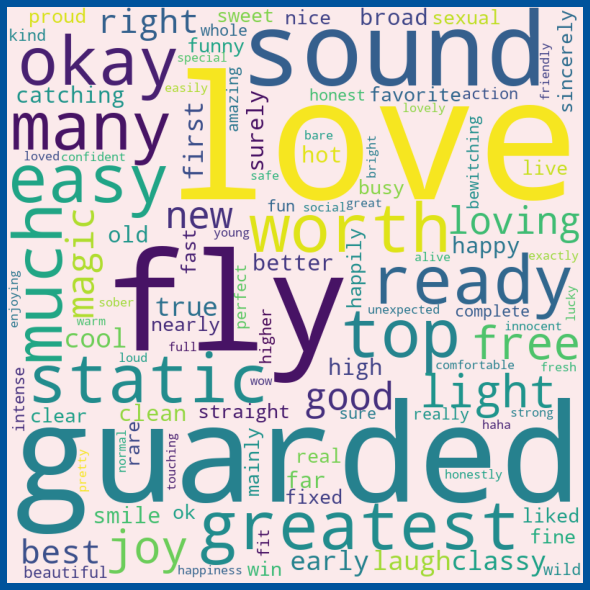

In [96]:
df = df_positive

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.Words:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='#FBEAEB',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = "#00539CFF")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


### Negatively Polarizes Words

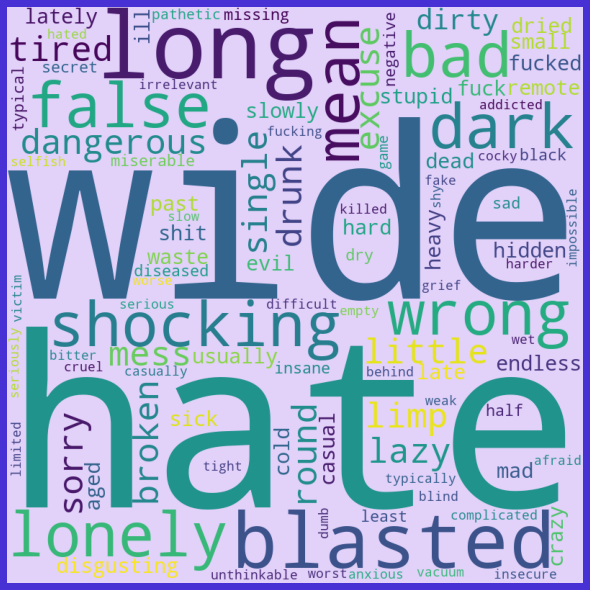

In [97]:
df = df_negative

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.Words:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='#E2D1F9',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = "#4831D4")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Neutral Polarized Words

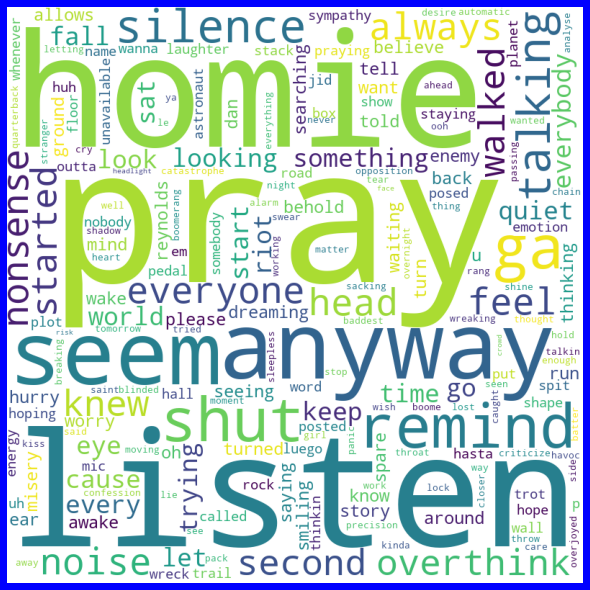

In [98]:

df = df_neutral

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.Words:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = "blue")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Most positive words

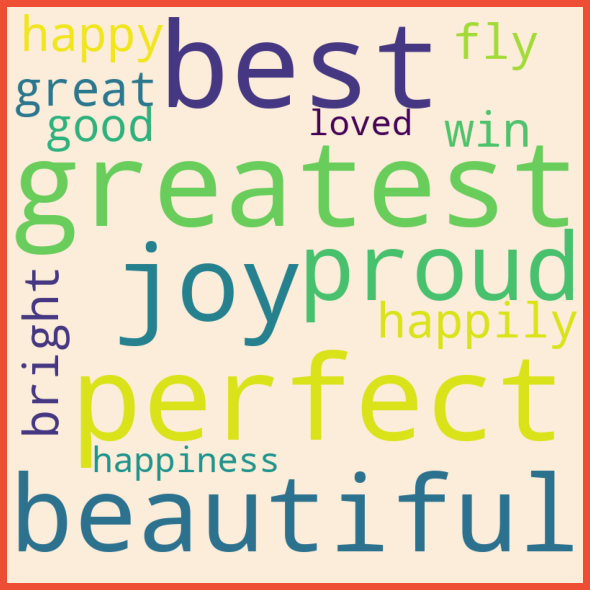

In [100]:

df = Polarity_sort_df

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.Words:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='#FCEDDA',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = "#EE4E34")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Most Negative words

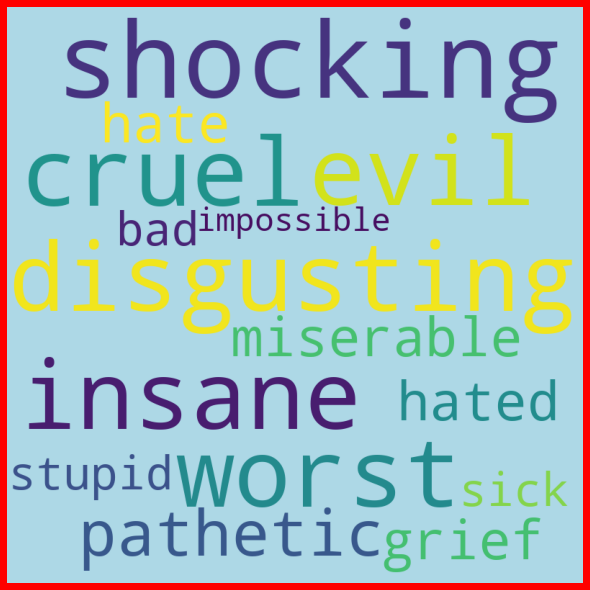

In [99]:
df = Negative_Polarity_sort_df

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.Words:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='#ADD8E6',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = "Red")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()